<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/Assigment2/MLAA_Notebook_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression


import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1.   Load Dataset

In [3]:
file_url = 'https://drive.google.com/uc?export=download&id=1I9YA9aI-Cnc_IsGjyKfD_PldX5nVMmR6'

In [4]:
df_total = pd.read_csv(file_url)

In [5]:
df_total.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


### 2. Explore Dataset

In [6]:
df = df_total.copy(deep = True)

In [7]:
df.shape

(131337, 17)

In [8]:
df.describe(include='all')

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,18962,62029,131337,131337,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
unique,NaN,NaN,7,2,19,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,4. 45 to 54,Male,model_2,Small/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4058,36072,34491,54553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,77097.384180,0.026809,NaN,NaN,NaN,NaN,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,NaN,NaN,NaN,NaN,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

#### Check for duplicates

In [10]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [ID, Target, age_band, gender, car_model, car_segment, age_of_vehicle_years, sched_serv_warr, non_sched_serv_warr, sched_serv_paid, non_sched_serv_paid, total_paid_services, total_services, mth_since_last_serv, annualised_mileage, num_dealers_visited, num_serv_dealer_purchased]
Index: []


There are no duplicate rows on the df

#### Check for null values

In [11]:
df.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

In [12]:
df.drop('ID', axis=1, inplace= True)

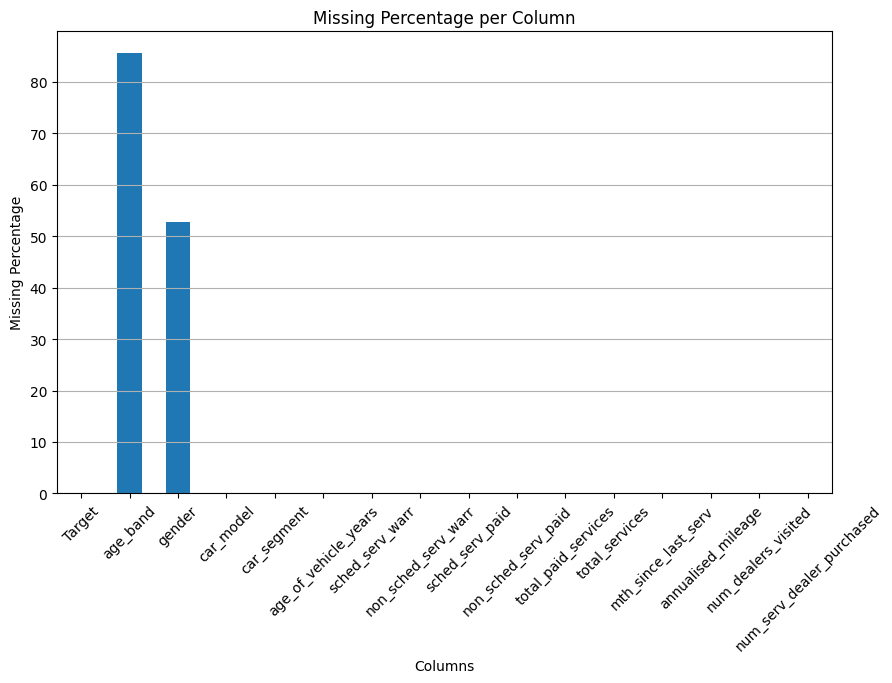

In [13]:
missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Missing Percentage per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

* Age_band may be better to remove since is almost completly Nan
* Is necessery to know how important is the gender varable to think is drop the variable or try to impute it.

#### Numerical data distribution

<Figure size 1000x600 with 0 Axes>

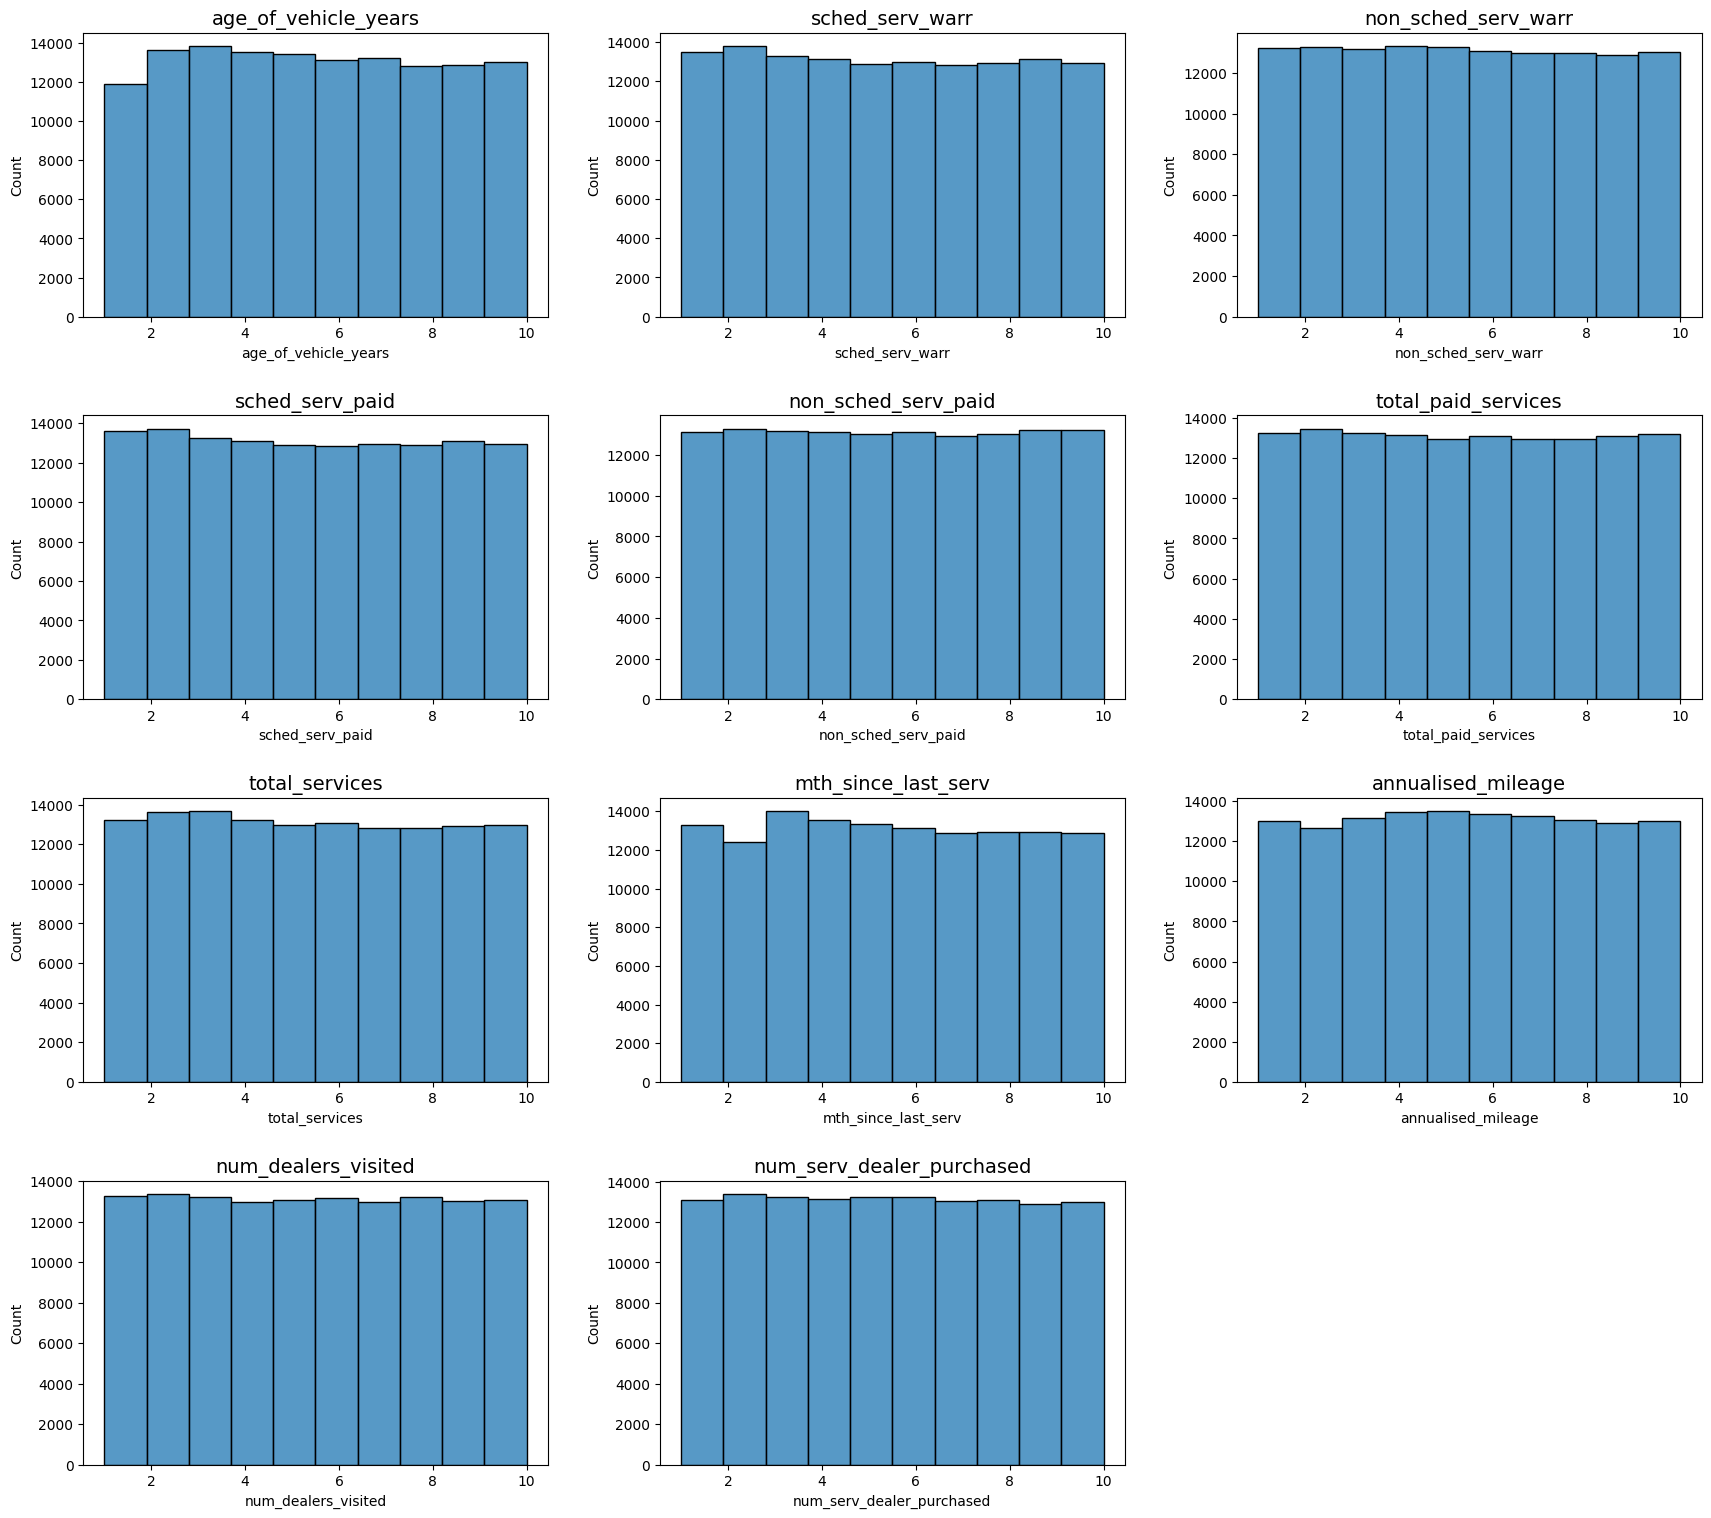

In [14]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop('Target', axis=1)

plt.figure(figsize=(10, 6))

n_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(df_numeric.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(df_numeric[col], ax=axs[row, col_idx], kde=False, bins=10)
    axs[row, col_idx].set_title(col, fontsize=14)

for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].set_visible(False)

plt.show()

due to the numerical representation in deciles, the distribution of all numerical variables can be seen to be very uniform.

#### Categorical variables distribution

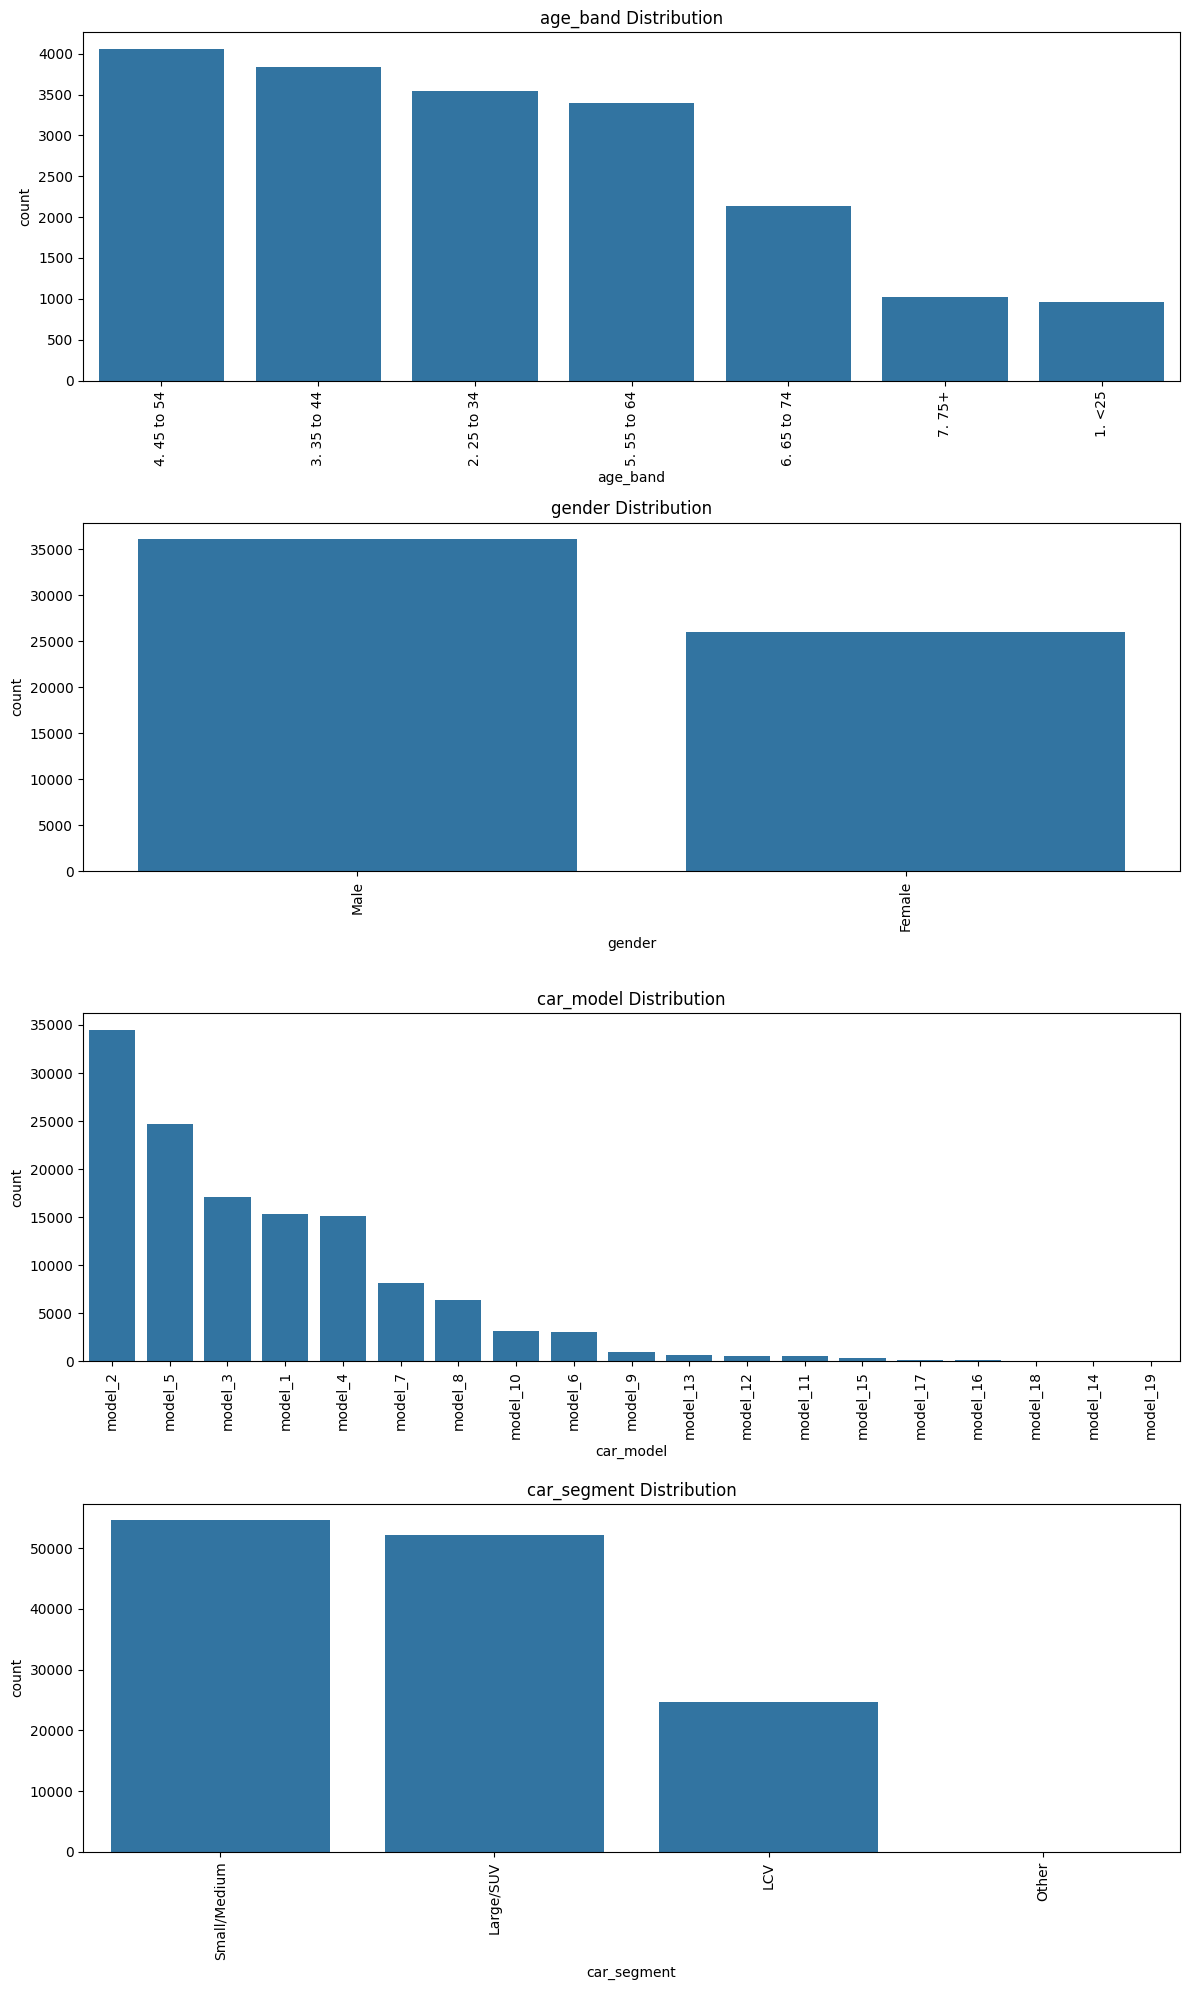

In [15]:
df_categorical = df.select_dtypes(include=['object', 'category'])

plt.figure(figsize=(12, 5 * len(df_categorical.columns)))

for i, col in enumerate(df_categorical.columns, 1):
    plt.subplot(len(df_categorical.columns), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

REVISAR QUE HACER CON LAS VARIABLES QUE SON CASI NULAS

#### Correlation heatmap

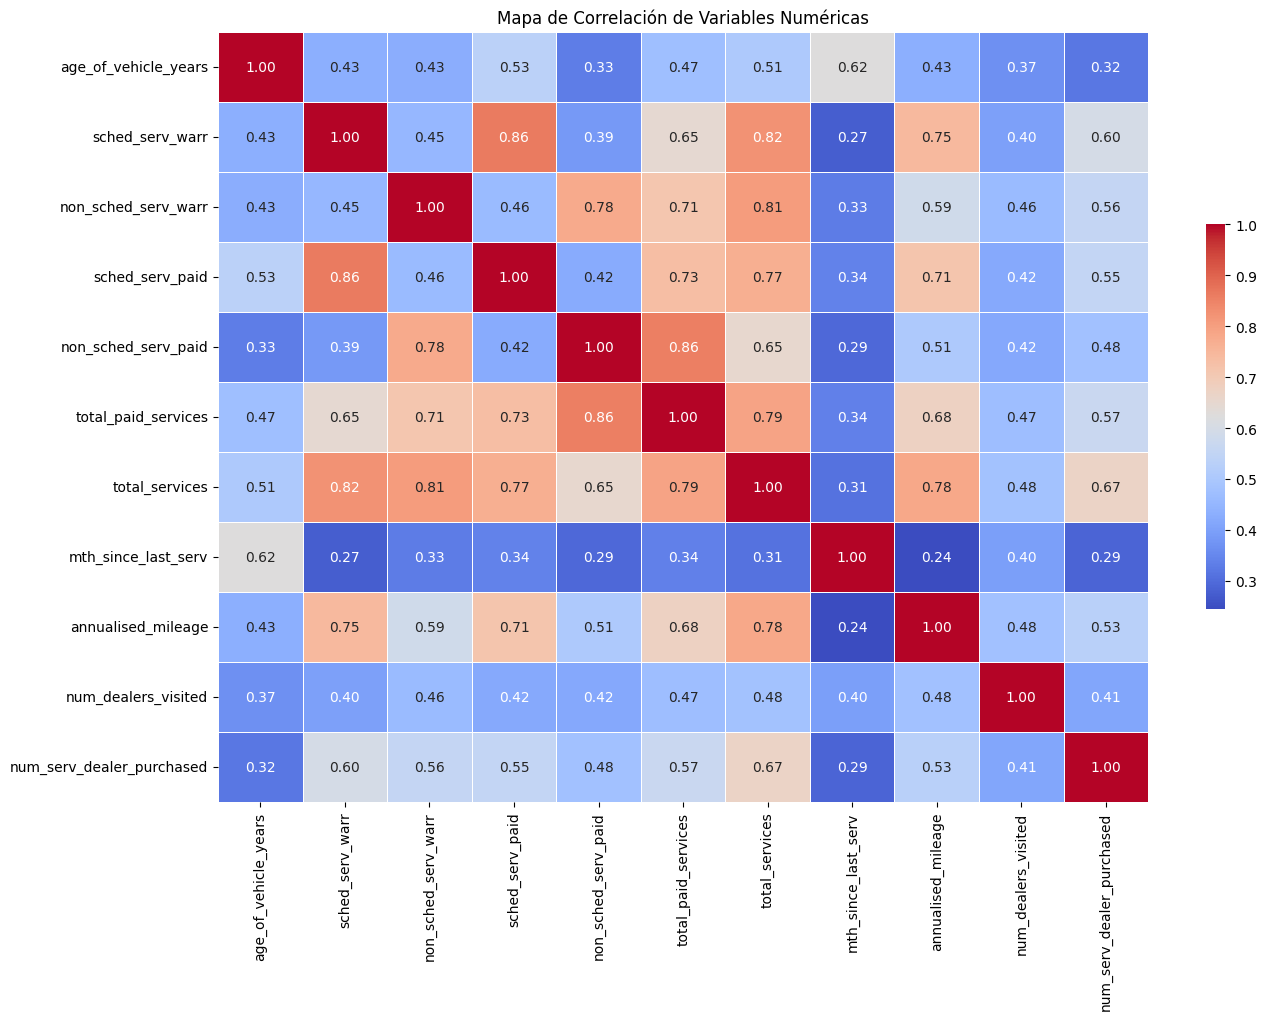

In [17]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop( 'Target', axis=1)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

There are highly correlated columns.

* total_paid_services - non_sched_serv_paid: 0.86
* sched_serv_paid - sched_serv_warr: 0.86
* total_services - sched_serv_warr: 0.82
* total_services - non_sched_serv_warr: 0.81

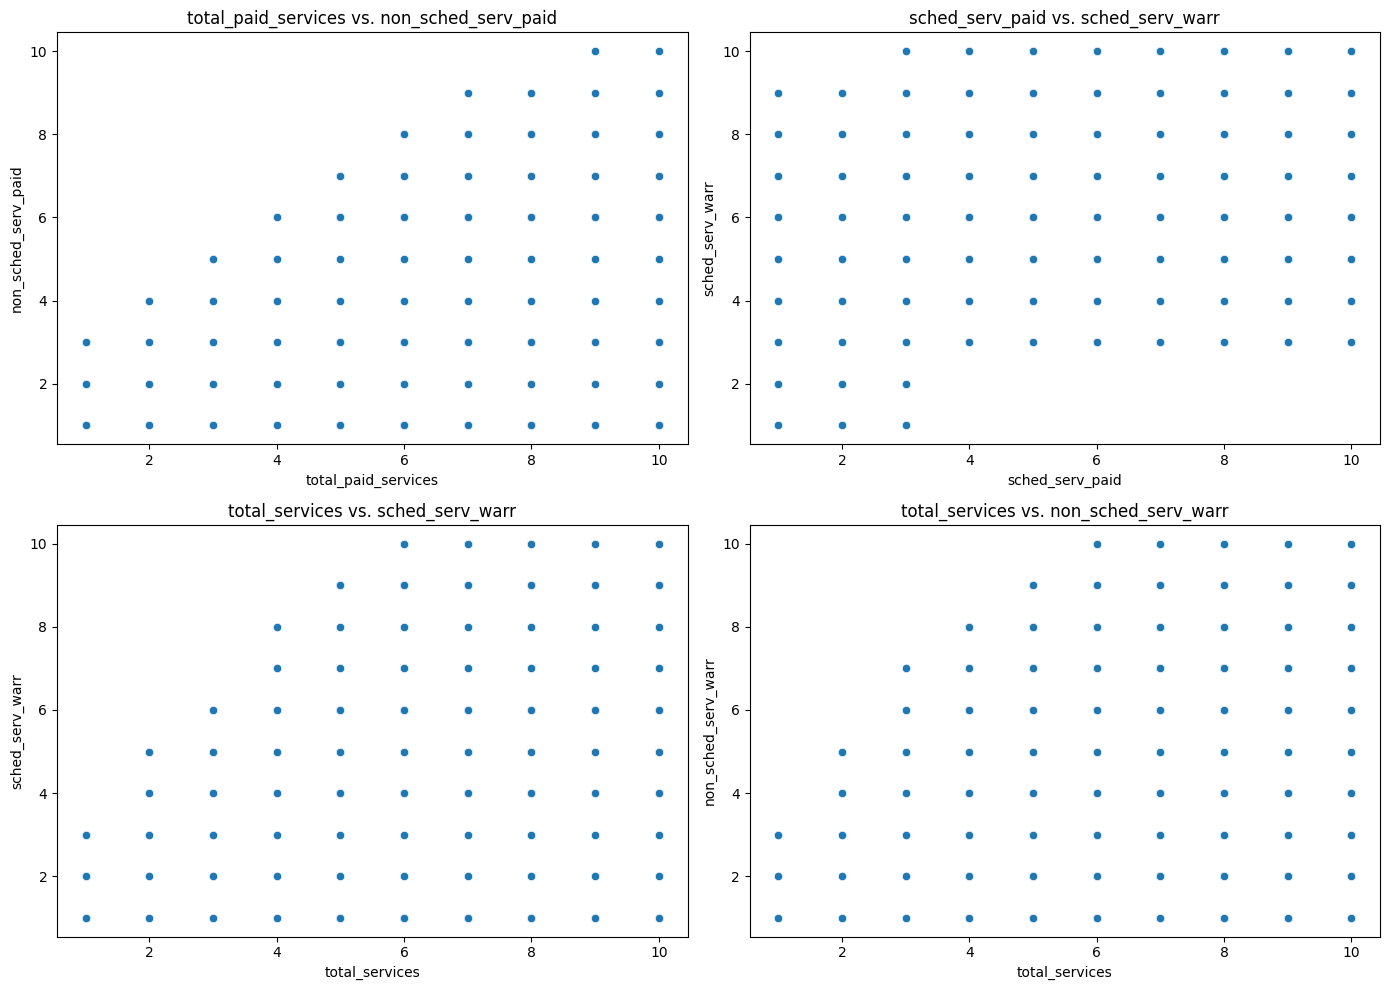

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(x='total_paid_services', y='non_sched_serv_paid', data=df, ax=axs[0, 0])
axs[0, 0].set_title('total_paid_services vs. non_sched_serv_paid')

sns.scatterplot(x='sched_serv_paid', y='sched_serv_warr', data=df, ax=axs[0, 1])
axs[0, 1].set_title('sched_serv_paid vs. sched_serv_warr')

sns.scatterplot(x='total_services', y='sched_serv_warr', data=df, ax=axs[1, 0])
axs[1, 0].set_title('total_services vs. sched_serv_warr')

sns.scatterplot(x='total_services', y='non_sched_serv_warr', data=df, ax=axs[1, 1])
axs[1, 1].set_title('total_services vs. non_sched_serv_warr')

plt.tight_layout()
plt.show()

VIF Calculation

In [19]:
columns = [
    'total_paid_services',
    'non_sched_serv_paid',
    'sched_serv_paid',
    'sched_serv_warr',
    'total_services',
    'non_sched_serv_warr'
]

df_numeric = df[columns]

df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).apply(lambda x: x.fillna(x.mean()),axis=0)

df_numeric_with_const = add_constant(df_numeric)

vif_data = pd.DataFrame()
vif_data["Variable"] = df_numeric_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric_with_const.values, i) for i in range(df_numeric_with_const.shape[1])]

print(vif_data)

              Variable        VIF
0                const   7.476339
1  total_paid_services  10.954585
2  non_sched_serv_paid   7.900461
3      sched_serv_paid   6.248749
4      sched_serv_warr   7.356458
5       total_services  12.533535
6  non_sched_serv_warr   6.364433


Calculating the VIF, it can be seen that the x and y varibals have high collinearity, as could be seen in the heat map above. Since the information is in deciles, only the columns with a VIF greater than 10 will be removed.

In [20]:
df.drop(['total_paid_services','total_services'], axis =1, inplace = True )

### 3. Explore Target variable

In [21]:
target = 'Target'

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

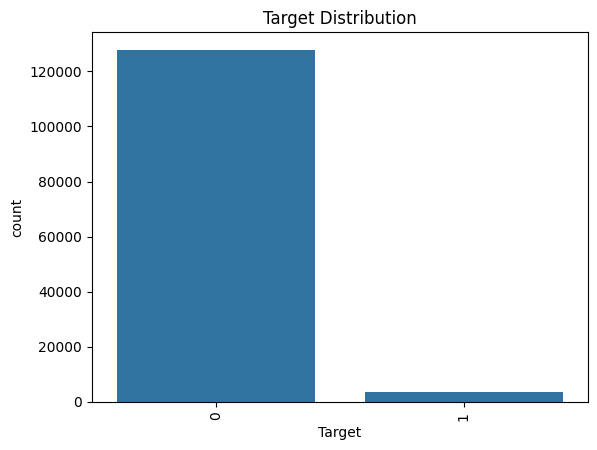

In [22]:
sns.countplot(data=df, x=target, order=df[target].value_counts().index)
plt.title(f'{target} Distribution')
plt.xticks(rotation=90)

imbalance target variable

### 4. Explore Variables of Interest

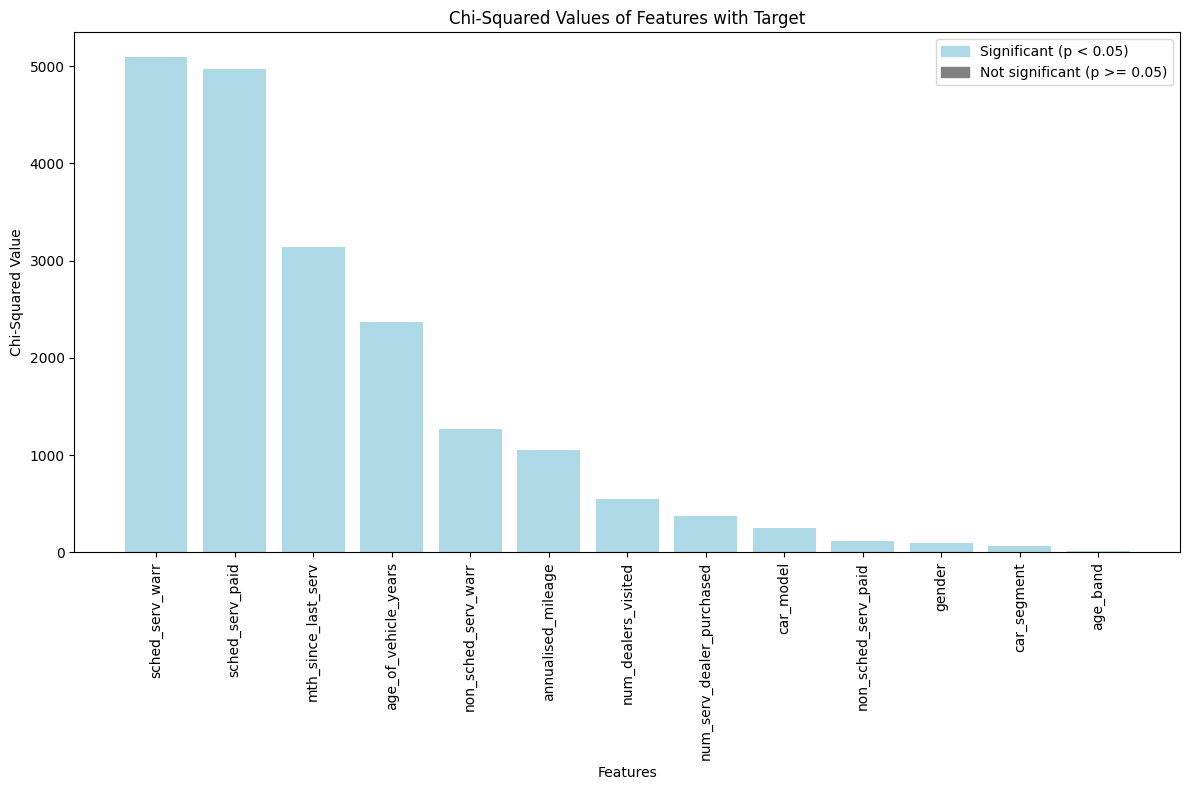

In [23]:

chi2_values = []
p_values = []
columns = []

for column in df.columns:
    if column != 'Target':
        if df[column].dtype in ['int64', 'float64']:

            df['bin'] = pd.qcut(df[column], q=5, duplicates='drop')
            cross_tab = pd.crosstab(df['bin'], df['Target'])
            df.drop('bin', axis=1, inplace=True)
        else:
            cross_tab = pd.crosstab(df[column], df['Target'])

        chi2, p, _, _ = chi2_contingency(cross_tab)
        chi2_values.append(chi2)
        p_values.append(p)
        columns.append(column)

sorted_indices = np.argsort(chi2_values)[::-1]
sorted_chi2 = np.array(chi2_values)[sorted_indices]
sorted_columns = np.array(columns)[sorted_indices]
sorted_p_values = np.array(p_values)[sorted_indices]

plt.figure(figsize=(12, 8))

significant_bar = mpatches.Patch(color='lightblue', label='Significant (p < 0.05)')
not_significant_bar = mpatches.Patch(color='gray', label='Not significant (p >= 0.05)')

for i, p in enumerate(sorted_p_values):
    color = 'lightblue' if p < 0.05 else 'gray'
    plt.bar(sorted_columns[i], sorted_chi2[i], color=color)

plt.title('Chi-Squared Values of Features with Target')
plt.ylabel('Chi-Squared Value')
plt.xlabel('Features')
plt.xticks(rotation=90)

plt.legend(handles=[significant_bar, not_significant_bar])

plt.tight_layout()
plt.show()





In [24]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

resultados = []

for col in columnas_categoricas:
    if col != 'Target':
        formula = f'Target ~ C({col})'
        modelo = ols(formula, data=df).fit()
        tabla_anova = sm.stats.anova_lm(modelo, typ=2)

        f_value = tabla_anova['F'][0]
        p_value = tabla_anova['PR(>F)'][0]

        resultados.append({'Variable': col, 'F-Value': f_value, 'P-Value': p_value})

resultados_anova = pd.DataFrame(resultados)

resultados_anova.sort_values(by='P-Value', inplace=True)

print(resultados_anova)

      Variable    F-Value       P-Value
2    car_model  13.672407  5.587327e-42
1       gender  96.313172  1.018863e-22
3  car_segment  22.975487  7.310143e-15
0     age_band   2.531513  1.886854e-02


In [25]:
def stacked_bar(predictor, response):
    normalized_ct = pd.crosstab(predictor, response, normalize='index')

    ax = normalized_ct.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Adding the annotations
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(height), (x + width/2, y + height/2), ha='center', va='center')

    plt.title('Stacked Bar Chart of ' + predictor.name + ' by '+ response.name)
    plt.ylabel('Proportion')
    plt.show()

### 5. Prepare Data

In [26]:
def clean_and_preprocess_df(df_treated):
    df_processing = df_treated.copy()

    df.gender = df.gender.fillna('Unknow')

    # Droping columns
    df_processing.drop(columns=['ID','age_band','total_paid_services','total_services'], inplace=True)

    #Feature scaling and transforming

    #Min Max Scaler
    numeric_cols = df_processing.select_dtypes(include=['float64', 'int64']).columns.drop('Target')
    scaler = MinMaxScaler()
    df_processing[numeric_cols] = scaler.fit_transform(df_processing[numeric_cols])

    # One hot encoding
    dummies_df = pd.get_dummies(df_processing[['car_model',	'car_segment', 'gender']], drop_first=True).astype(int)
    df_processing = pd.concat([df_processing, dummies_df], axis=1)
    df_processing.drop(['car_model',	'car_segment', 'gender'], axis=1, inplace=True)

    return df_processing

In [27]:
clean_and_preprocess_df(df_total).head(1)

,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_model_model_10,car_model_model_11,car_model_model_12,car_model_model_13,car_model_model_14,car_model_model_15,car_model_model_16,car_model_model_17,car_model_model_18,car_model_model_19,car_model_model_2,car_model_model_3,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium,gender_Male
0,0,0.888889,0.111111,1.0,0.222222,0.666667,0.888889,0.777778,1.0,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 6. Split Dataset

In [28]:
df_model = clean_and_preprocess_df(df_total)

In [29]:
X = df_model.drop('Target', axis=1)
y = df_model['Target']

In [30]:
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42,stratify=y_model)

### 7. Baseline Model

In [31]:
train_mode = statistics.mode(y_train)

In [32]:
y_central_train = np.full(y_train.shape, train_mode)
y_central_val = np.full(y_val.shape, train_mode)
y_central_test = np.full(y_test.shape, train_mode)

In [33]:
accuracy_train_baseline = accuracy_score(y_train, y_central_train)
precision_train_baseline = precision_score(y_train, y_central_train, average='macro', zero_division=0)
recall_train_baseline = recall_score(y_train, y_central_train, average='macro')
f1_train_baseline = f1_score(y_train, y_central_train, average='macro')

accuracy_val_baseline = accuracy_score(y_val, y_central_val)
precision_val_baseline = precision_score(y_val, y_central_val, average='macro', zero_division=0)
recall_val_baseline = recall_score(y_val, y_central_val, average='macro')
f1_val_baseline = f1_score(y_val, y_central_val, average='macro')

accuracy_test_baseline = accuracy_score(y_test, y_central_test)
precision_test_baseline = precision_score(y_test, y_central_test, average='macro', zero_division=0)
recall_test_baseline = recall_score(y_test, y_central_test, average='macro')
f1_test_baseline = f1_score(y_test, y_central_test, average='macro')

In [34]:
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy_train_baseline, accuracy_val_baseline, accuracy_test_baseline],
    'Precision': [precision_train_baseline, precision_val_baseline, precision_test_baseline],
    'Recall': [recall_train_baseline, recall_val_baseline, recall_test_baseline],
    'F1 Score': [f1_train_baseline, f1_val_baseline, f1_test_baseline]
}, index=['Train Baseline', 'Validation Baseline', 'Test Baseline'])

In [35]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.973184,0.486592,0.5,0.493205
Validation Baseline,0.973208,0.486604,0.5,0.493211
Test Baseline,0.973199,0.486600,0.5,0.493209


### 8. Train Machine Learning Model

In [36]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

In [38]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average='macro', zero_division=0)
recall_val = recall_score(y_val, y_pred_val, average='macro')
f1_val = f1_score(y_val, y_pred_val, average='macro')

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

In [39]:
new_results = pd.DataFrame({
    'Accuracy': [accuracy_train, accuracy_val, accuracy_test],
    'Precision': [precision_train, precision_val, precision_test],
    'Recall': [recall_train, recall_val, recall_test],
    'F1 Score': [f1_train, f1_val, f1_test]
}, index=['LR Train', 'LR Validation', 'LR Test'])

metrics_df = pd.concat([metrics_df, new_results])

In [40]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.973184,0.486592,0.500000,0.493205
Validation Baseline,0.973208,0.486604,0.500000,0.493211
Test Baseline,0.973199,0.486600,0.500000,0.493209
LR Train,0.976373,0.898863,0.575629,0.622366
LR Validation,0.976587,0.910949,0.576873,0.624683
LR Test,0.976169,0.879900,0.576118,0.622211


In [41]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.973184,0.486592,0.500000,0.493205
Validation Baseline,0.973208,0.486604,0.500000,0.493211
Test Baseline,0.973199,0.486600,0.500000,0.493209
LR Train,0.976373,0.898863,0.575629,0.622366
LR Validation,0.976587,0.910949,0.576873,0.624683
LR Test,0.976169,0.879900,0.576118,0.622211


Tunning Hyperparameters

In [42]:
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

log_reg = LogisticRegression(solver='liblinear')

kfold = KFold(n_splits=5, random_state=1, shuffle=True)

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, verbose=1, scoring='recall', n_jobs=-1)

grid_search.fit(X, y)

# Review the results
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print('Best parameters found: ', best_params)
print('Best cross-validated score (accuracy): ', best_score)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found:  {'C': 0.0006951927961775605, 'class_weight': 'balanced', 'penalty': 'l2'}
Best cross-validated score (accuracy):  0.8981882989298453


In [43]:
model = LogisticRegression(C=best_params['C'],class_weight=best_params['class_weight'],penalty=best_params['penalty'],solver='liblinear',random_state=0).fit(X_train, y_train)

### 9. Assess Model Performance

In [44]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

In [45]:
accuracy_train_tunned = accuracy_score(y_train, y_pred_train)
precision_train_tunned = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
recall_train_tunned = recall_score(y_train, y_pred_train, average='macro')
f1_train_tunned = f1_score(y_train, y_pred_train, average='macro')

accuracy_val_tunned = accuracy_score(y_val, y_pred_val)
precision_val_tunned = precision_score(y_val, y_pred_val, average='macro', zero_division=0)
recall_val_tunned = recall_score(y_val, y_pred_val, average='macro')
f1_val_tunned = f1_score(y_val, y_pred_val, average='macro')

accuracy_test_tunned = accuracy_score(y_test, y_pred_test)
precision_test_tunned = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
recall_test_tunned = recall_score(y_test, y_pred_test, average='macro')
f1_test_tunned = f1_score(y_test, y_pred_test, average='macro')

In [46]:
new_results = pd.DataFrame({
    'Accuracy': [accuracy_train_tunned, accuracy_val_tunned, accuracy_test_tunned],
    'Precision': [precision_train_tunned, precision_val_tunned, precision_test_tunned],
    'Recall': [recall_train_tunned, recall_val_tunned, recall_test_tunned],
    'F1 Score': [f1_train_tunned, f1_val_tunned, f1_test_tunned]
}, index=['LR Train tunned', 'LR Validation tunned', 'LR Test tunned'])

metrics_df = pd.concat([metrics_df, new_results])

In [47]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.973184,0.486592,0.500000,0.493205
Validation Baseline,0.973208,0.486604,0.500000,0.493211
Test Baseline,0.973199,0.486600,0.500000,0.493209
LR Train,0.976373,0.898863,0.575629,0.622366
LR Validation,0.976587,0.910949,0.576873,0.624683
LR Test,0.976169,0.879900,0.576118,0.622211
LR Train tunned,0.762584,0.544603,0.827759,0.514978
LR Validation tunned,0.761778,0.544335,0.826655,0.514304
LR Test tunned,0.761192,0.545159,0.833796,0.515115
